In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns;

In [9]:
df = pd.read_excel('MSdata.xlsx','Assignment-1')
print(df.shape)
df.head()

(16834, 16)


,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

>  *>>missing values in link_clicks* 

In [11]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


>*the data given is of a specific product and phase (product1)*

>*so product and phase  attribute dosent paly a role in modelling*

Product 1    16834
Name: product, dtype: int64


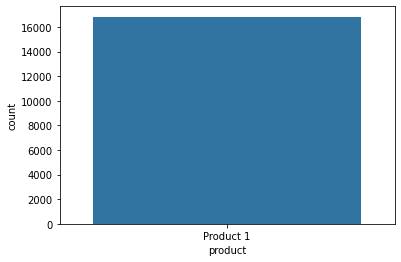

Performance    16834
Name: phase, dtype: int64


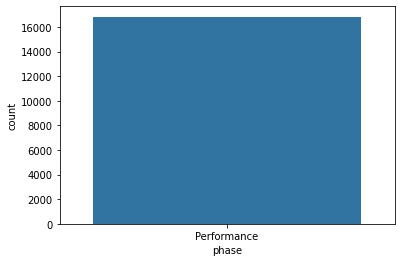

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64


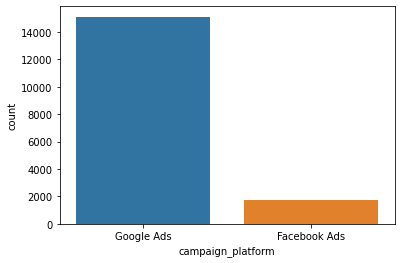

Search         15101
Conversions     1733
Name: campaign_type, dtype: int64


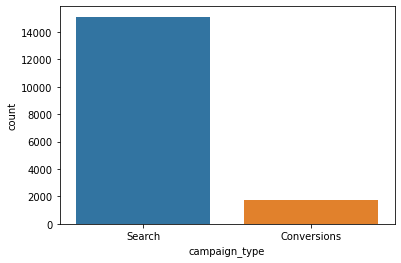

Search Keywords    15101
Creative            1733
Name: communication_medium, dtype: int64


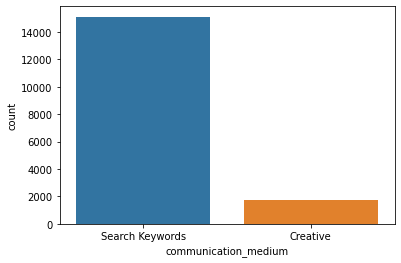

Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64


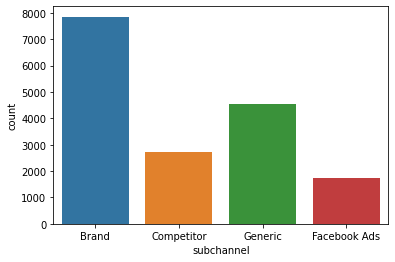

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64


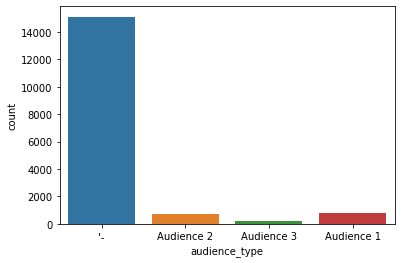

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64


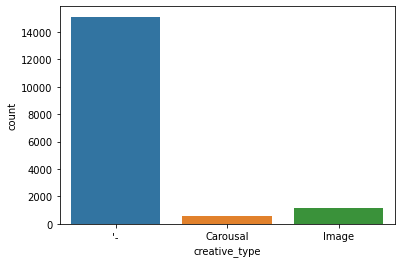

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64


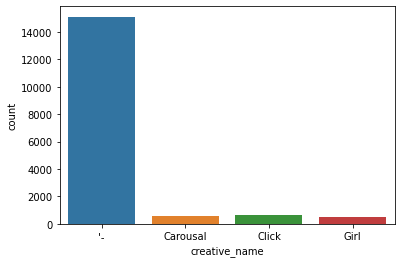

Mobile     7357
Desktop    6318
device     1733
Tablet     1426
Name: device, dtype: int64


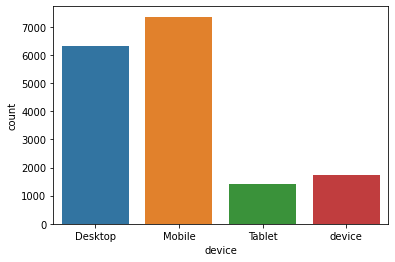

25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64


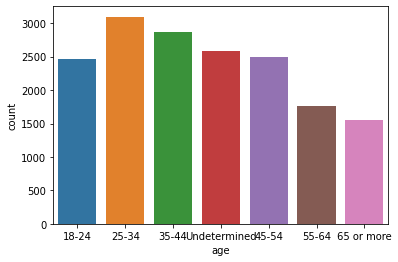

In [106]:
cat_cols=['product',	'phase',	'campaign_platform',	'campaign_type',	'communication_medium',
      'subchannel',	'audience_type',	'creative_type',	'creative_name',	'device',	'age'	]
#plt.figure(figsize=(10,8))
for cols in cat_cols:
  plt.figure()
  print(df[cols].value_counts())
  sns.countplot(x = cols, data = df)
  #df[cols].value_counts().plot(kind='bar')
  #df[cols].value_counts()
  plt.show()


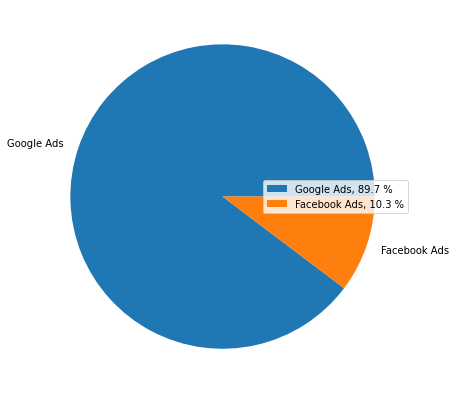

<Figure size 432x288 with 0 Axes>

In [171]:
pf = df['campaign_platform'].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(pf.values, labels = pf.index)
plt.legend( loc = 'right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, pf.values/168.34)])
plt.show()
plt.savefig("pf.png")

>Given data is about a specific product and phase (product1)so product and phase  attribute dosent paly a role in modelling
>



In [49]:
print(df['campaign_type'].value_counts())   
print(' ')                                     #value counts of campaign type
print('>>campaign_type')
print(df[df.campaign_platform =='Google Ads']['campaign_type'].value_counts())  #value counts of campaign type with google_ads as platform
print(df[df.campaign_platform =='Facebook Ads']['campaign_type'].value_counts()) #value counts of campaign type with fb_ads as platform
print(' ')

print('>>communication_medium')
print(df[df.campaign_platform =='Google Ads']['communication_medium'].value_counts())  #value counts of communication medium with google_ads as platform
print(df[df.campaign_platform =='Facebook Ads']['communication_medium'].value_counts())      #value counts of communication medium with fb_ads as platform
print(' ')

print('>>subchannel')
print(df[df.campaign_platform =='Google Ads']['subchannel'].value_counts())  #value counts of subchannel with google_ads as platform
print(df[df.campaign_platform =='Facebook Ads']['subchannel'].value_counts()) #value counts of subchannel with fb_ads as platform


Search         15101
Conversions     1733
Name: campaign_type, dtype: int64
 
>>campaign_type
Search    15101
Name: campaign_type, dtype: int64
Conversions    1733
Name: campaign_type, dtype: int64
 
>>communication_medium
Search Keywords    15101
Name: communication_medium, dtype: int64
Creative    1733
Name: communication_medium, dtype: int64
 
>>subchannel
Brand         7853
Generic       4544
Competitor    2704
Name: subchannel, dtype: int64
Facebook Ads    1733
Name: subchannel, dtype: int64


>We see that when campaign_platform is **Google Ads** ,campaign type is **Search** and communication_medium is **Search Keywords** 

>when campaign_platform is  **Facebook Ads**, campaign type is  **Conversions** and communication_medium is **Creative**

>*Brand*, *Generic* and *Competetior* (subcategories) corresponds to **Google Ads**

>> **conclusion**: campaign_platform, campaign_type and subcategory are fully corelated (coef=1)

In [97]:
print('>>creative_name')
print(df[df.campaign_platform =='Google Ads']['creative_name'].value_counts())  #value counts of creative_name with google_ads as platform
print(df[df.campaign_platform =='Facebook Ads']['creative_name'].value_counts()) #value counts ofcreative_name with fb_ads as platform
print(' ')

print('>>creative_type')
print(df[df.campaign_platform =='Google Ads']['creative_type'].value_counts())  #value counts of creative_name with google_ads as platform
print(df[df.campaign_platform =='Facebook Ads']['creative_type'].value_counts()) #value counts ofcreative_name with fb_ads as platform
print(' ')

print('>>device')
print(df[df.campaign_platform =='Google Ads']['device'].value_counts())  #value counts of device with google_ads as platform
print(' ')
print(df[df.campaign_platform =='Facebook Ads']['device'].value_counts()) #value counts of device with fb_ads as platform


>>creative_name
'-    15101
Name: creative_name, dtype: int64
Click       644
Carousal    603
Girl        486
Name: creative_name, dtype: int64
 
>>creative_type
'-    15101
Name: creative_type, dtype: int64
Image       1130
Carousal     603
Name: creative_type, dtype: int64
 
>>device
Mobile     7357
Desktop    6318
Tablet     1426
Name: device, dtype: int64
 
device    1733
Name: device, dtype: int64


> creative type **'_** corresponds to **Google Ads** , **Carousal**  and  **image** corresponds to **Facebook Ads** 

>creative name **click and girl**  corresponds to **image** careative type of **Facebook Ads** 

>**Google** is specifying the device as **Mobile / Desktop / Tablet** where as Facebook returns **device** as device type

In [66]:
print(df['age'].value_counts())
print(' ')
print('>>Google')
print(df[df.campaign_platform =='Google Ads']['age'].value_counts())  #value counts of creative_name with google_ads as platform
print(' ')
print('>>Facebook')
print(df[df.campaign_platform =='Facebook Ads']['age'].value_counts()) #value counts ofcreative_name with fb_ads as platform


25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64
 
>>Google
25-34           2609
Undetermined    2586
18-24           2472
35-44           2380
45-54           2022
65 or more      1558
55-64           1474
Name: age, dtype: int64
 
>>Facebook
25-34    488
35-44    485
45-54    477
55-64    283
Name: age, dtype: int64


In [67]:
# avg visitors per b/w unit age_grp
print('18-24 :',2472/(24-18))
print('25-34 :',2609/(34-25))
print('35-44 :' ,2380/(44-35))
print('45-54 :',2022/(54-45))
print('55-64 :',1474/(64-55))

18-24 : 412.0
25-34 : 289.8888888888889
35-44 : 264.44444444444446
45-54 : 224.66666666666666
55-64 : 163.77777777777777


array([3097, 2865, 2586, 2499, 2472, 1757, 1558])

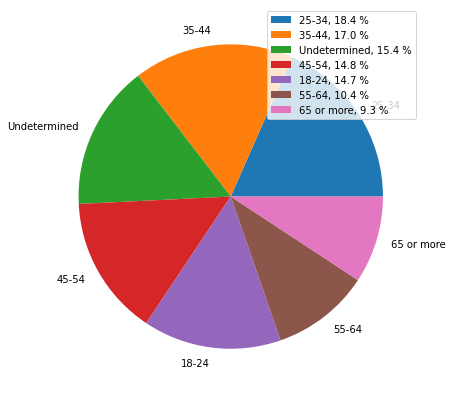

<Figure size 432x288 with 0 Axes>

In [194]:
ag = df['age'].value_counts()
plt.figure(figsize = (7,7 ))
plt.pie(ag.values, labels = ag.index)
plt.legend( loc = 'upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(ag.index, ag.values/168.34)])
plt.show()
plt.savefig("age.png")

>age group 18-24 are active visitors on google but they dont use facebook

>age group 25-34 have highest number of visitors on Google and facebook(This is trageted age group)

>age group 35-44 and 45-54 have good number of visitors on Google and facebook (can be a targeted age group)

>facebook is giving age perfectly


In [92]:
def encoding_time_spent_by_visitors(sec):
  r=np.zeros(len(sec))
  for i in range(len(sec)):
    if sec[i] == 0.0:
        r[i] = 0
    elif 0 < sec[i] <= 15:
        r[i]= 1
    elif 15 < sec[i] <= 2*60:
        r[i] = 2
    elif 2*60 < sec[i] <= 5*60:
        r[i] = 3
    elif 5*60 < sec[i] <= 10*60:
        r[i] = 4
    elif 10*60 < sec[i] <= 30*60:
        r[i] = 5
    elif 30*60 < sec[i] <= 60*60:
        r[i] =  6
    elif 60*60 < sec[i] <= 120*60:
        r[i] =  7
    else:
        r[i] = 8
  return r  

In [93]:
df['time_spent_grp'] = encoding_time_spent_by_visitors(df['spends'].values)

2.0    5393
0.0    4104
1.0    3354
3.0    1979
4.0    1132
5.0     668
6.0     133
7.0      53
8.0      18
Name: time_spent_grp, dtype: int64


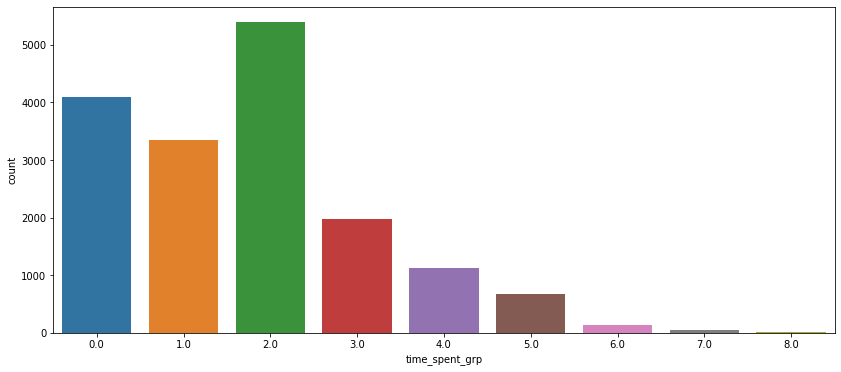

In [110]:
print(df['time_spent_grp'].value_counts())
plt.figure(figsize=(14,6))
sns.countplot( df['time_spent_grp'])

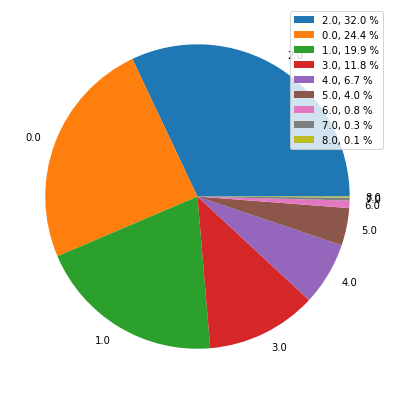

<Figure size 432x288 with 0 Axes>

In [197]:
times = df['time_spent_grp'].value_counts()
plt.figure(figsize = (7, 7))
plt.pie(times.values, labels = times.index)
plt.legend( loc = 'upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(times.index, times.values/168.34)])
plt.show()
plt.savefig("spent-cat.png")

users with impression less than  :  12124


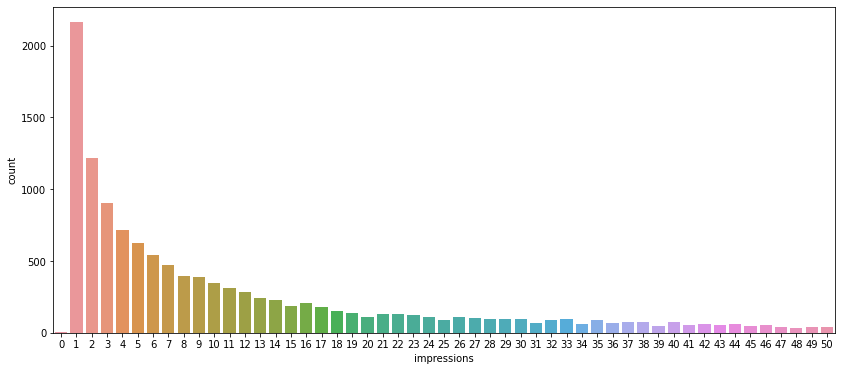

In [136]:
print('users with impression less than  : ',df[df.impressions <=50]['impressions'].value_counts().sum())
plt.figure(figsize=(14,6))
sns.countplot(df[df.impressions <=50]['impressions'])

In [149]:
def encoding_impression(imp):
  r=np.zeros(len(imp))
  for i in range(len(imp)):
    if imp[i] <=3:
        r[i] = 0
    elif 3 < imp[i] <= 6:
        r[i]= 1
    elif 6 < imp[i] <= 12:
        r[i] = 2
    elif 12 <  imp[i] <= 25:
        r[i] = 3
    elif 25 < imp[i] <= 60:
        r[i] = 4
    elif  60 < imp[i] <= 125 :
        r[i] = 5
    else:
        r[i] = 6
  return r  

In [150]:
df['impressions_enc'] = encoding_impression(df['impressions'].values)

0.0    4291
2.0    2186
4.0    2116
3.0    2034
1.0    1881
7.0    1543
5.0    1493
6.0    1290
Name: impressions_enc, dtype: int64


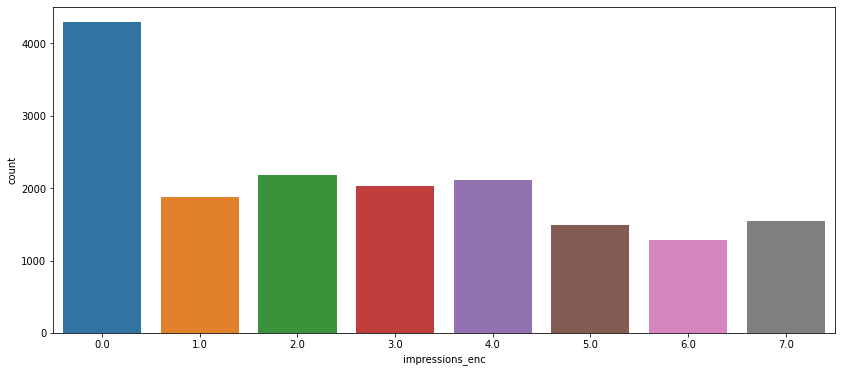

In [151]:
print(df['impressions_enc'].value_counts())
plt.figure(figsize=(14,6))
sns.countplot( df['impressions_enc'])

users with impression less than  :  16240


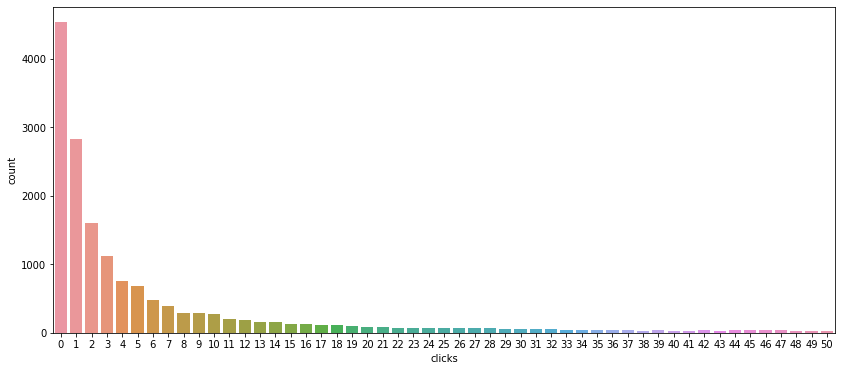

In [156]:
print('users with impression less than  : ',df[df.clicks <=60]['clicks'].value_counts().sum())
plt.figure(figsize=(14,6))
sns.countplot(df[df.clicks <=50]['clicks'])

**16240/16834  visitors had clicked lessthan tham 60 times**

In [161]:
def encoding_clicks(imp):
  r=np.zeros(len(imp))
  for i in range(len(imp)):
    if imp[i] <=3:
        r[i] = 0
    elif 3 < imp[i] <= 7:
        r[i]= 1
    elif 6 < imp[i] <= 14:
        r[i] = 2
    elif 14 <  imp[i] <= 25:
        r[i] = 3
    elif 25 < imp[i] <= 50:
        r[i] = 4
    else:
        r[i] = 5
  return r 

In [159]:
df['clicks_enc'] = encoding_clicks(df['clicks'].values)

0.0    10075
1.0     2301
3.0     1354
2.0     1261
4.0     1042
5.0      801
Name: clicks_enc, dtype: int64


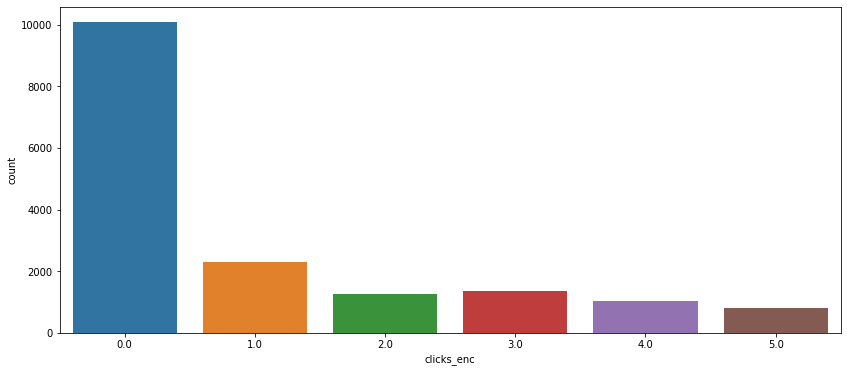

In [162]:
print(df['clicks_enc'].value_counts())
plt.figure(figsize=(14,6))
sns.countplot( df['clicks_enc'])

In [198]:
print('>>Google')
print(df[df.campaign_platform =='Google Ads']['link_clicks'].value_counts())  #value counts of creative_name with google_ads as platform
print(' ')
print('>>Facebook')
print(df[df.campaign_platform =='Facebook Ads']['link_clicks'].value_counts()) 

>>Google
0.0    15101
Name: link_clicks, dtype: int64
 
>>Facebook
1.0      233
2.0      104
3.0       87
4.0       64
5.0       47
        ... 
135.0      1
149.0      1
98.0       1
57.0       1
299.0      1
Name: link_clicks, Length: 159, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


users with link_clicks less than  :  382


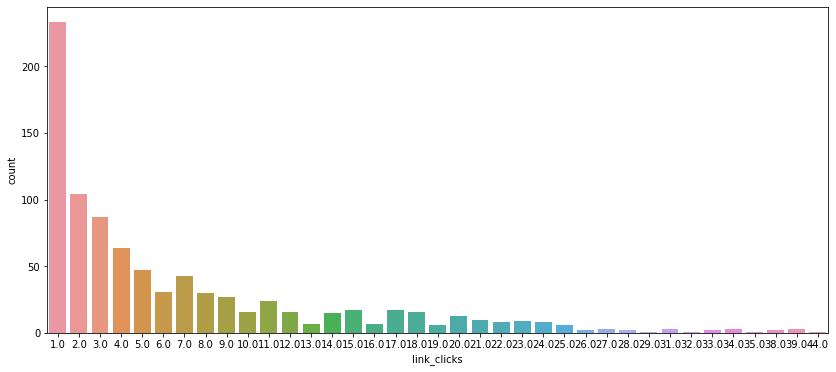

In [207]:
print('users with link_clicks less than  : ',df[df.campaign_platform =='Facebook Ads'][df.clicks <=5]['link_clicks'].value_counts().sum());
plt.figure(figsize=(14,6));
sns.countplot(df[df.campaign_platform =='Facebook Ads'][df.clicks <=50]['link_clicks']);

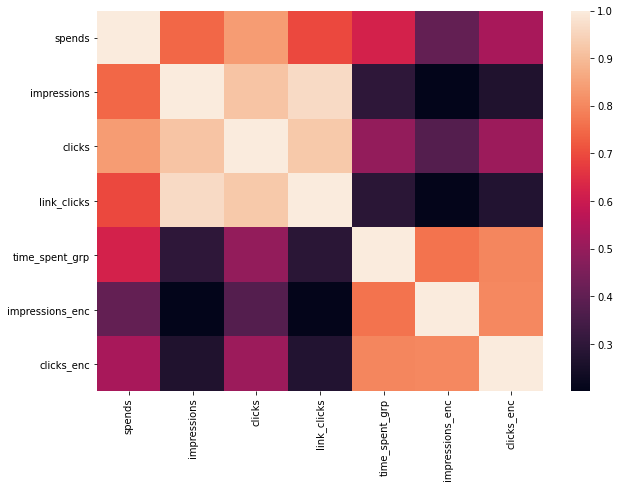

In [212]:
hm=df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(hm)

# Summary

**Date** : 
>16th October 2019 -  7th July, 2020.

**Product :** 
>The whole marketing campaign data is representing about Performance phase of the product.

**campaign_platform :**
> Getting more attraction from Google Ads.
>>Percentage of Attraction from Google Ads : 15101 (89.7%)

>>Percentage of Attraction from Facebook Ads : 1733 (10.3%)

**Campaign_type & Communication_Medium:**

>Both Campaign_type & Communication_Medium  represents similar feature as. Campaign Platform 
>>   Google Ads >> Search >> Search Keywords

>>  Facebook Ads >> Conversions >> Creative


**Subcannel :**
>there are 3 Subchannels for Google Ads :-
 >>Brand 7853(52%)
 
 >>Generic 4544(30.1%) and  

 >>Competitor 2704(17.9%)
>For Facebook Ads, There are no subchannels.


**Audience Type:**
>There are three kinds of Audience Type related to the Facebook Ads. 
>>Audience 1 : 813 

>>Audience 2 : 738 

>>Audience 3 : 182

**Creative type and name :**
facebook ads: 
>Image 1130 (65.25%)
>> click - 644

>> Girl - 486
>Carousal - 603 ( 34.8%)

**Device:**
>Google Ads has device type but there is no appropriate data on Facebook Ads

>Google Ads -
>> Mobile : 7357 (48.72%)

>> Desktop : 6318 (41.84%)

>> Tablet : 1426 (9.44%)

**Spend Time:**
>The Maximum Time spended on the website is 9221.96 seconds (153)

>76% of  people spended less than 2 mins and 25% never spent time

**Link Clicks:**
>In Google Ads there are no link clicks.
> In Facebook Ads link clicks 635 visitors had lick clicks below 15 and  382 users below 5